# Analysis of ICTUS distance matrices

We look at the distance matrices between data points, and between neural network centers and data points, in order to try to find out what makes the NN centers so special.

The neural network centers are the same as in the `Projected prediction experiment` notebook: 7 centers extracted from a simple sigmoid network.

In [1]:
%matplotlib notebook

In [2]:
from scipy.io import loadmat
from scipy.spatial.distance import pdist, squareform, cdist
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
import numpy as np
import math

## Load and scale the data

In [3]:
fpath = "run_all.mat"
data_dict = loadmat(fpath)
X = data_dict["X"]
Y = data_dict["Y"]

In [35]:
Xpre = scale(X, axis=0, with_mean=True, with_std=True)

In [5]:
weights = loadmat("nn_weights_experiments/nn_weights7sigmoid.mat")
W0 = weights["W0"]

## Calculate pairwise square euclidean distance

In [6]:
dist = pdist(Xpre, "sqeuclidean")
dist = squareform(dist)
# Remove trivial nearest neighbors
dist += np.eye(dist.shape[0]) * 10**8

nn_dist = cdist(W0, Xpre, 'sqeuclidean')
print("X distances: %s - NN distances: %s" % (dist.shape, nn_dist.shape))

X distances: (29545, 29545) - NN distances: (7, 29545)


In [7]:
dist_nc = dist - np.eye(dist.shape[0]) * 10**8

## Nearest Neighbors

In [8]:
def nearest(dmat, i, num=1, is_nn=False, distances=True):
    nn_str = "center" if is_nn else "data-point"
    if num == 1:
        neighbor_idx = np.argmin(dmat[i,:])
        print("Nearest neighbor of %s %d is %d with distance %.2f" % 
              (nn_str, i, neighbor_idx, dmat[i, neighbor_idx]))
    else:
        sorted_row = np.argsort(dmat[i,:])  # Ascending
        neighbor_idx = sorted_row[:num]
        print("Nearest neighbors of %s %d are %s" % (nn_str, i, neighbor_idx))
        if distances:
            print("with distances %s" % (dmat[i, neighbor_idx]))
        

## Analysis of distance matrix
#### We print the 5 nearest neighbors to the neural-network centers in the whole dataset.

In [9]:
nearest(nn_dist, 0, 5, True)
print()
nearest(nn_dist, 1, 5, True)
print()
nearest(nn_dist, 2, 5, True)
print()
nearest(nn_dist, 3, 5, True)
print()
nearest(nn_dist, 4, 5, True)
print()
nearest(nn_dist, 5, 5, True)
print()
nearest(nn_dist, 6, 5, True)

Nearest neighbors of center 0 are [ 9398 12645 13891  9888 20633]
with distances [144.69461418 145.33277646 146.84477189 152.19826618 153.26928078]

Nearest neighbors of center 1 are [12645 29274  9398 13891 21570]
with distances [163.17466482 169.10666846 172.67453487 174.92532577 182.00920163]

Nearest neighbors of center 2 are [29274 12645  9398 13891  9888]
with distances [156.78196461 159.94120897 161.39759957 162.51928605 163.52528861]

Nearest neighbors of center 3 are [12645  9398 29274 13891  9888]
with distances [157.38045674 158.25344463 161.24892777 163.99220998 167.30128244]

Nearest neighbors of center 4 are [13891  9398  9888 12645  6976]
with distances [133.12601977 137.22040109 137.65274199 138.00350388 141.13379782]

Nearest neighbors of center 5 are [29274  9398 13891 12645  9888]
with distances [141.86307096 147.89533216 151.81025054 154.03368164 156.60748989]

Nearest neighbors of center 6 are [29274 13891  9398  9888  6976]
with distances [138.54156559 144.2941617

Here we look at the 1-NN of the NN centers (which are 4 distinct points in the data) and compare their distance to the closest NN center, with their distance to the closest data points.

We find that with the exception of `12645` which has more than 5 neighbors in the data closer than the closest NN center, the other 3 1-NN data-points are closer to the closest NN center than to most data-points.


Point `9398` is closer to `18335` than to the closest NN center.

Point `12645` is closer to `13891, 27015, 9888, ...` than to the closest NN center.

Point `29274` is closer to its closest NN center than to its closest data-point.

Point `13891` is closer to `1261, 12645` than to the closest NN center.

In [10]:
nearest(dist, 9398, 5)
print()
nearest(dist, 12645, 5)
print()
nearest(dist, 29274, 5)
print()
nearest(dist, 13891, 5)

Nearest neighbors of data-point 9398 are [18335 12645 14943  3994  8455]
with distances [136.28493408 151.27034243 162.46663104 168.1559893  168.2468345 ]

Nearest neighbors of data-point 12645 are [13891 27015  9888 26087  1007]
with distances [130.19522118 140.91726513 144.64237926 147.59135691 148.31082816]

Nearest neighbors of data-point 29274 are [ 6976 21570  8455  3350 29263]
with distances [146.06796275 155.53665726 163.34332161 167.98708777 172.47190047]

Nearest neighbors of data-point 13891 are [ 1261 12645 12195 15061  9888]
with distances [121.54162433 130.19522118 137.50584968 142.36156235 144.539867  ]


We notice that all NN centers have the same nearest-neighbors in the data. Therefore the centers are in a small subspace of the data, surrounded by the same data points:
`9398, 12645, 13891, 9888, 29274, 6965`

In [11]:
for i in range(7):
    nearest(nn_dist, i, 5, True, False)

Nearest neighbors of center 0 are [ 9398 12645 13891  9888 20633]
Nearest neighbors of center 1 are [12645 29274  9398 13891 21570]
Nearest neighbors of center 2 are [29274 12645  9398 13891  9888]
Nearest neighbors of center 3 are [12645  9398 29274 13891  9888]
Nearest neighbors of center 4 are [13891  9398  9888 12645  6976]
Nearest neighbors of center 5 are [29274  9398 13891 12645  9888]
Nearest neighbors of center 6 are [29274 13891  9398  9888  6976]


## Distribution of the distance matrix
The distribution of the distances from the NN centers and from the points close to them is very similar.

Contrast this with the distribution of distances from some random points which is instead quite different, with a generally larger mean!

<IPython.core.display.Javascript object>


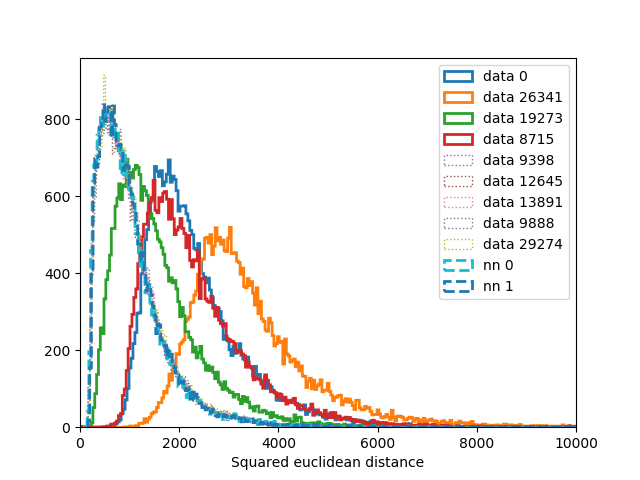

In [12]:
fig, ax = plt.subplots()
# Distribution of distances from random points in the data
ax.hist(dist_nc[0,:], bins=1000, label="data 0", histtype="step", linewidth=2)
ax.hist(dist_nc[26341,:], bins=1000, label="data 26341", histtype="step", linewidth=2)
ax.hist(dist_nc[19273,:], bins=1000, label="data 19273", histtype="step", linewidth=2)
ax.hist(dist_nc[8715,:], bins=1000, label="data 8715", histtype="step", linewidth=2)
# Distribution of distances from points close to the NN centers
ax.hist(dist_nc[9398,:], bins=1000, label="data 9398", histtype="step", linestyle=('dotted'), linewidth=1)
ax.hist(dist_nc[12645,:], bins=1000, label="data 12645", histtype="step", linestyle=('dotted'), linewidth=1)
ax.hist(dist_nc[13891,:], bins=1000, label="data 13891", histtype="step", linestyle=('dotted'), linewidth=1)
ax.hist(dist_nc[9888,:], bins=1000, label="data 9888", histtype="step", linestyle=('dotted'), linewidth=1)
ax.hist(dist_nc[29274,:], bins=1000, label="data 29274", histtype="step", linestyle=('dotted'), linewidth=1)
# Distribution of distances from NN centers
ax.hist(nn_dist[0,:], bins=1000, label="nn 0", histtype="step", linestyle=('dashed'), linewidth=2)
ax.hist(nn_dist[1,:], bins=1000, label="nn 1", histtype="step", linestyle=('dashed'), linewidth=2)
ax.legend(loc="best")
ax.set_xlim([0, 10000])
_ = ax.set_xlabel("Squared euclidean distance")

The NN centers tend to have lower distance to the other data-points than the average distance between data-points.
The centers are thus **in the center of the data**?

<IPython.core.display.Javascript object>


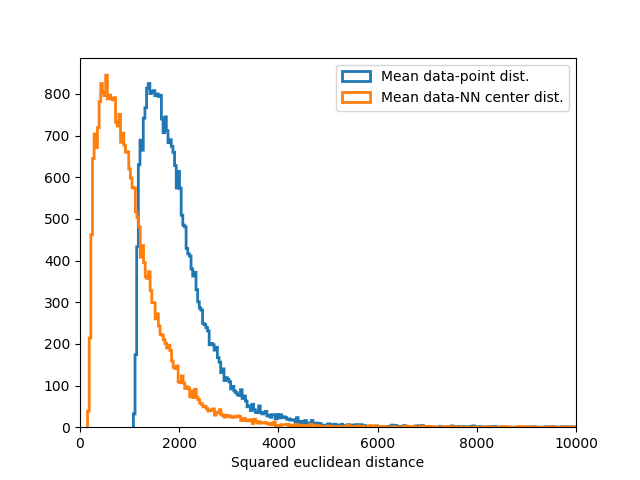

In [19]:
mean_distances = dist_nc.mean(axis=1)
fig, ax = plt.subplots()
_ = ax.hist(mean_distances, histtype='step', bins=1000, linewidth=2, label="Mean data-point dist.")
_ = ax.hist(nn_dist.mean(axis=0), histtype='step', bins=1000, linewidth=2, label="Mean data-NN center dist.")
ax.set_xlim([0, 10000])
ax.legend(loc="best")
_ = ax.set_xlabel("Squared euclidean distance")

## Plots of the NN centers vs. their closest points

This plot shows that the similarity between the neural-network centers and their closest neighbors in the dataset is a similarity in **pixel intensity** rather than in the actual image content. This could explain the fact that if we substitute the NN centers by their closest points in KRR we don't get good results.


<IPython.core.display.Javascript object>


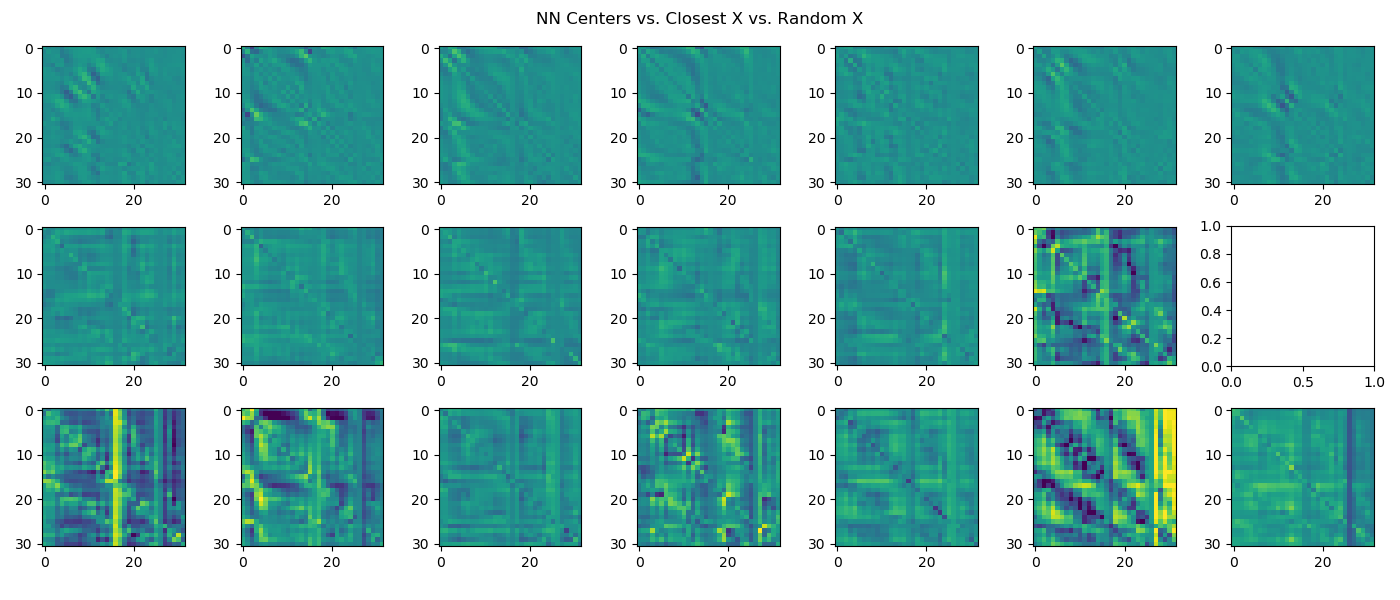

In [38]:
fig, ax = plt.subplots(ncols=7, nrows=3, figsize=(14, 6))
ax = ax.ravel()
vmin, vmax = -3, 3
im = ax[0].imshow(W0[0].reshape(31, 32), vmin=vmin, vmax=vmax)
im = ax[1].imshow(W0[1].reshape(31, 32), vmin=vmin, vmax=vmax)
im = ax[2].imshow(W0[2].reshape(31, 32), vmin=vmin, vmax=vmax)
im = ax[3].imshow(W0[3].reshape(31, 32), vmin=vmin, vmax=vmax)
im = ax[4].imshow(W0[4].reshape(31, 32), vmin=vmin, vmax=vmax)
im = ax[5].imshow(W0[5].reshape(31, 32), vmin=vmin, vmax=vmax)
im = ax[6].imshow(W0[6].reshape(31, 32), vmin=vmin, vmax=vmax)

im = ax[7].imshow(Xpre[9398].reshape(31, 32), vmin=vmin, vmax=vmax)
im = ax[8].imshow(Xpre[12645].reshape(31, 32), vmin=vmin, vmax=vmax)
im = ax[9].imshow(Xpre[13891].reshape(31, 32), vmin=vmin, vmax=vmax)
im = ax[10].imshow(Xpre[9888].reshape(31, 32), vmin=vmin, vmax=vmax)
im = ax[11].imshow(Xpre[29274].reshape(31, 32), vmin=vmin, vmax=vmax)
im = ax[12].imshow(Xpre[6965].reshape(31, 32), vmin=vmin, vmax=vmax)

im = ax[14].imshow(Xpre[0].reshape(31, 32), vmin=vmin, vmax=vmax)
im = ax[15].imshow(Xpre[123].reshape(31, 32), vmin=vmin, vmax=vmax)
im = ax[16].imshow(Xpre[1234].reshape(31, 32), vmin=vmin, vmax=vmax)
im = ax[17].imshow(Xpre[12345].reshape(31, 32), vmin=vmin, vmax=vmax)
im = ax[18].imshow(Xpre[5432].reshape(31, 32), vmin=vmin, vmax=vmax)
im = ax[19].imshow(Xpre[4321].reshape(31, 32), vmin=vmin, vmax=vmax)
im = ax[20].imshow(Xpre[9999].reshape(31, 32), vmin=vmin, vmax=vmax)
#fig.colorbar(im, ax=ax.ravel().tolist())
fig.suptitle("NN Centers vs. Closest X vs. Random X")
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
